## This notebook plots the allocations of the portfolios in each pareto front

In [24]:
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
df = pd.read_csv('../../data/final_daily_returns_asset_classes.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [16]:
asset_classes = df.columns

In [17]:
def load_pareto_fronts(json_file):
    with open(json_file, 'r') as file:
        data = json.load(file)
    
    all_runs = []
    for entry in data:
        pareto_front = []
        for solution in entry.get("solutions", []):
            # Ensure solution is a dictionary
            if isinstance(solution, dict):
                pareto_front.append({
                    "weights": solution.get("weights", []),
                    "expected_return": solution.get("expected_return", 0),
                    "SCR_risk": solution.get("SCR_risk", 0),
                    "risk_measure": solution.get("risk_measure", ""),
                    "distribution": solution.get("distribution", ""),
                    "period": solution.get("period", [])
                })
        all_runs.append(pareto_front)
    return all_runs

json_file_path = "../pareto_front_results.json"
pareto_fronts = load_pareto_fronts(json_file_path)

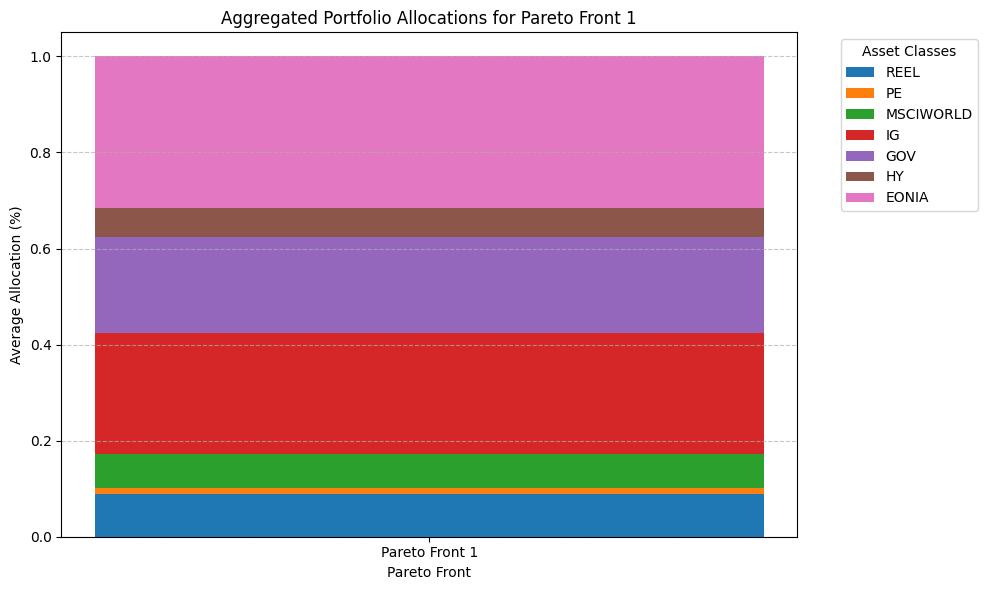

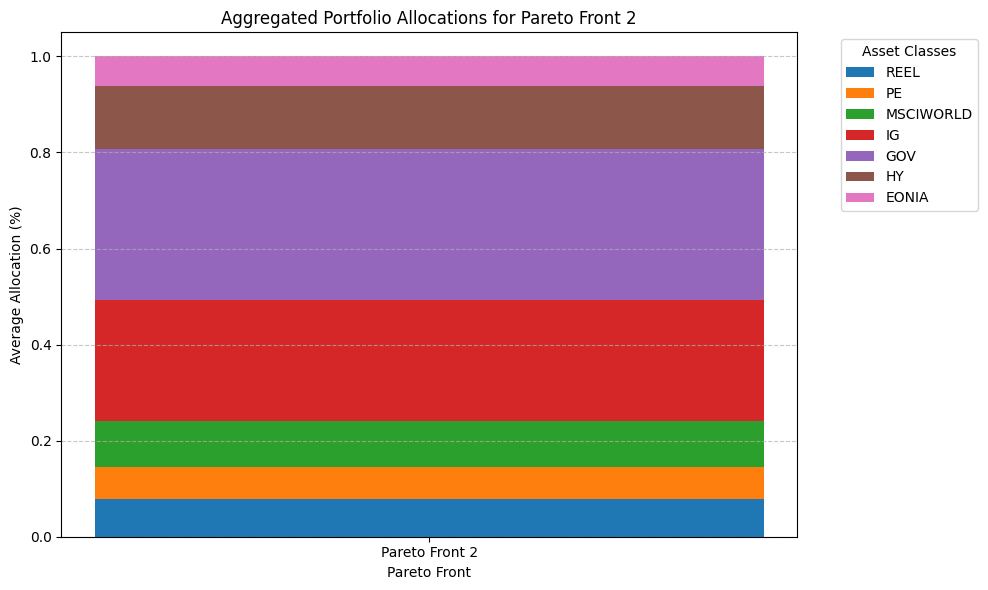

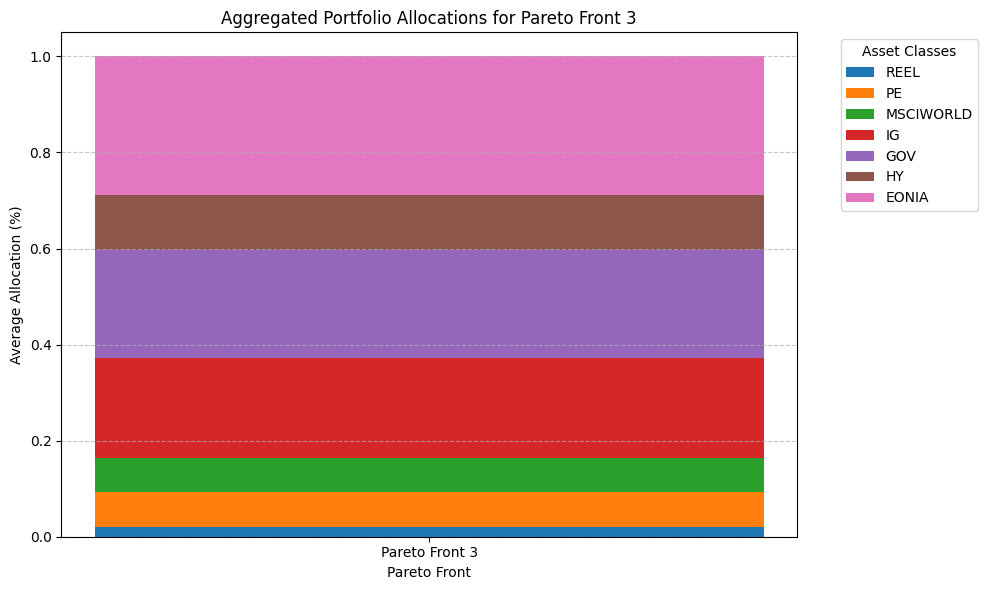

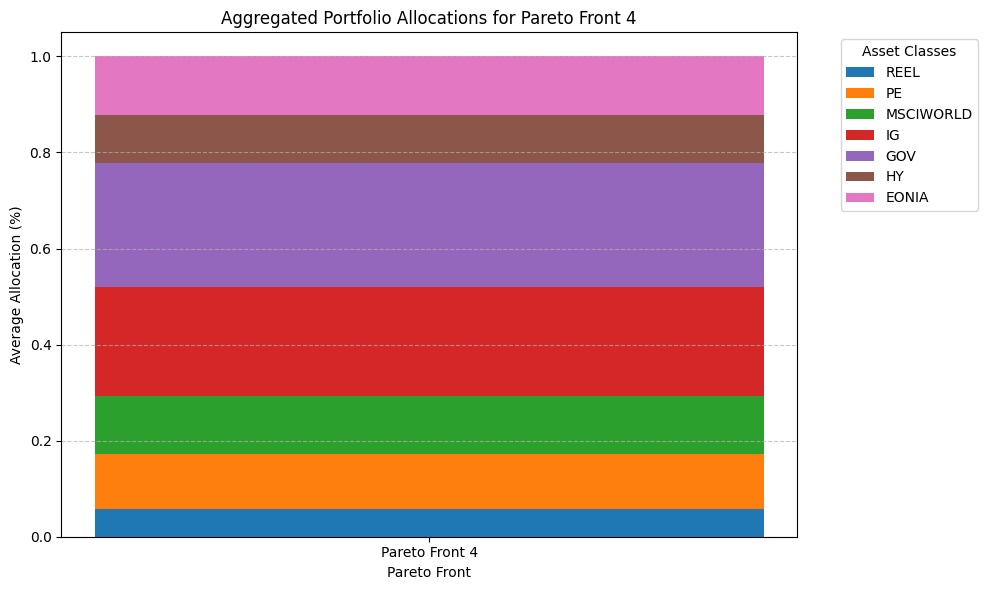

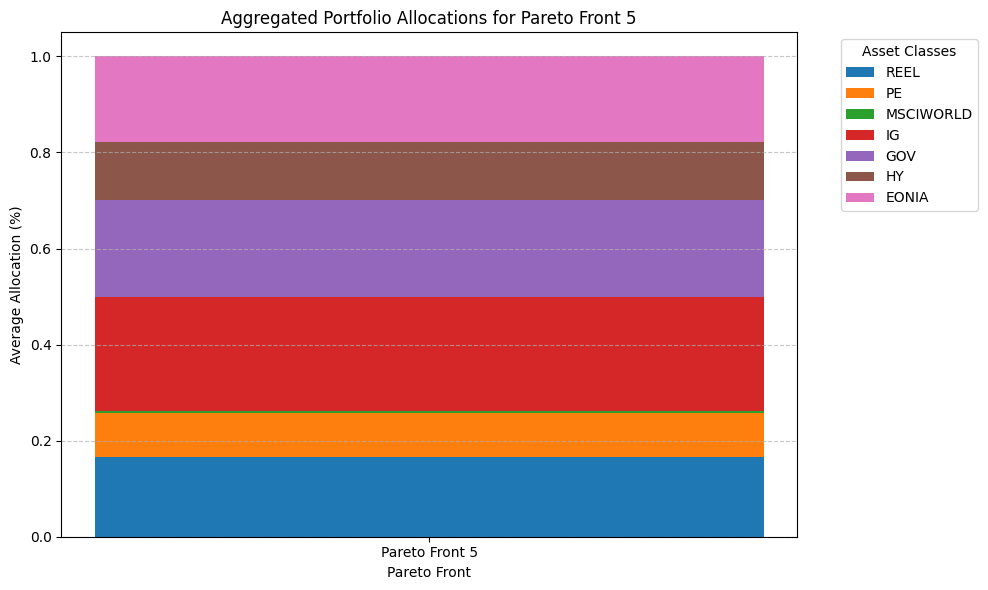

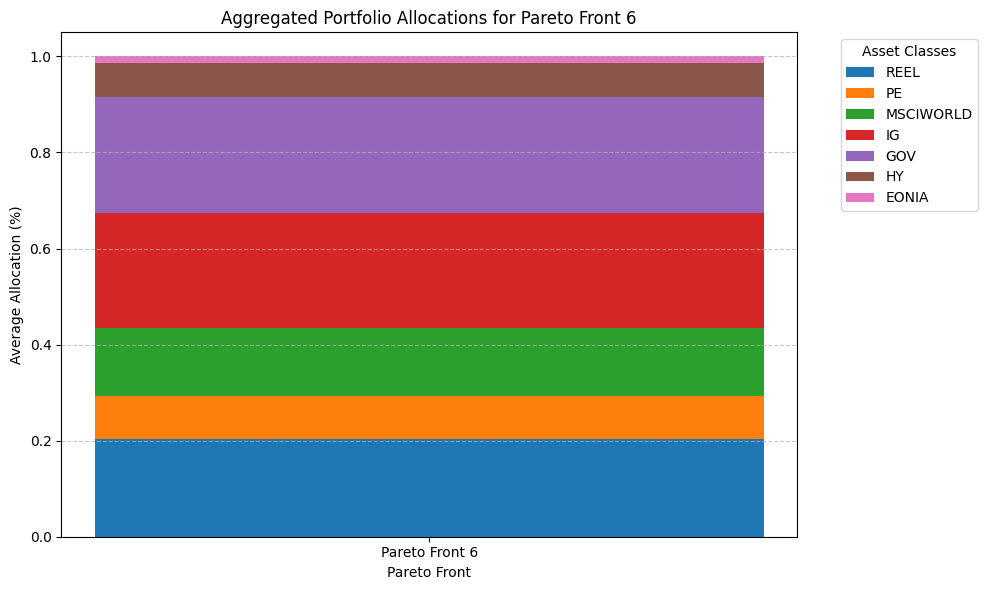

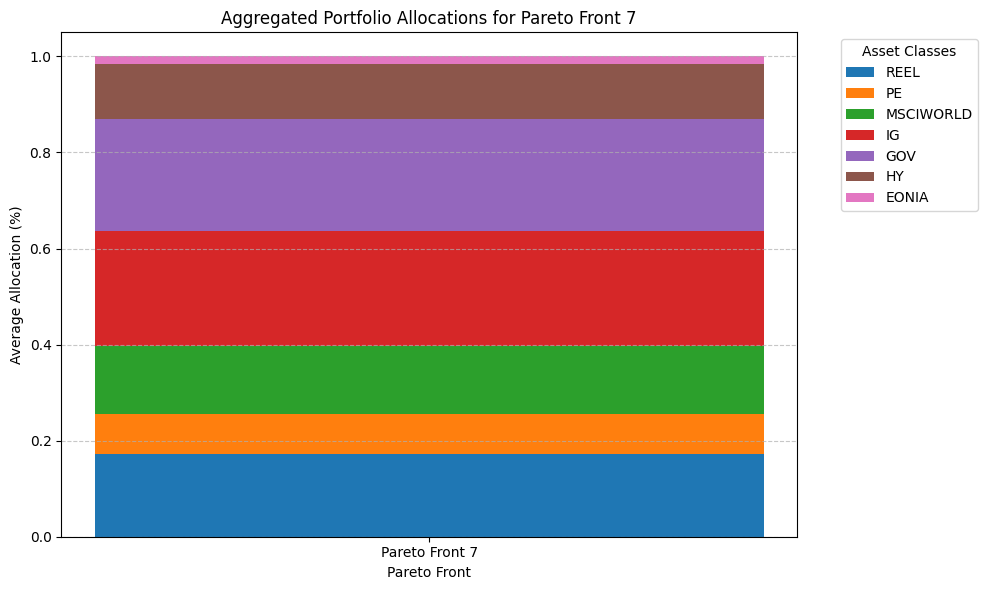

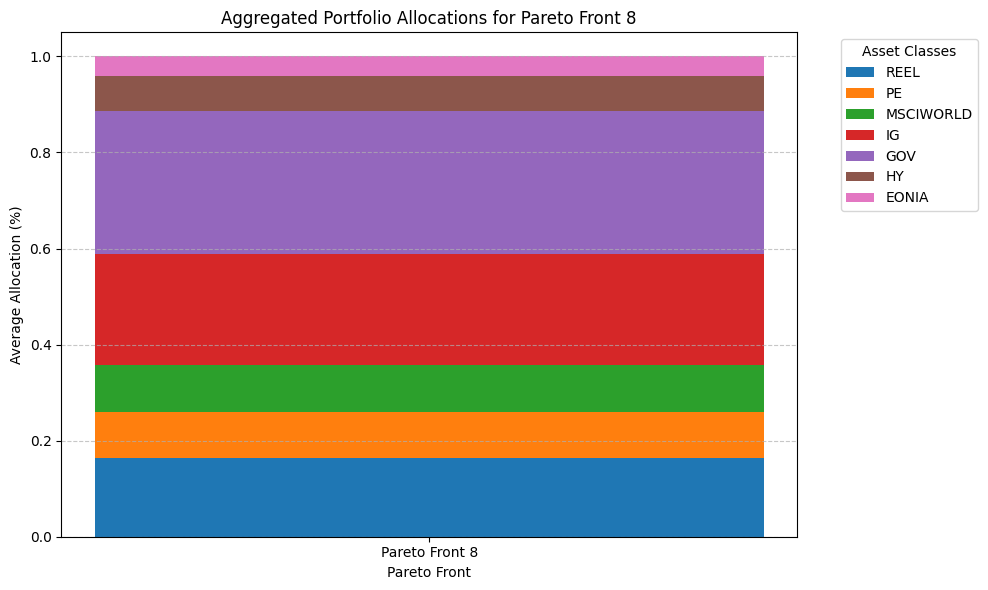

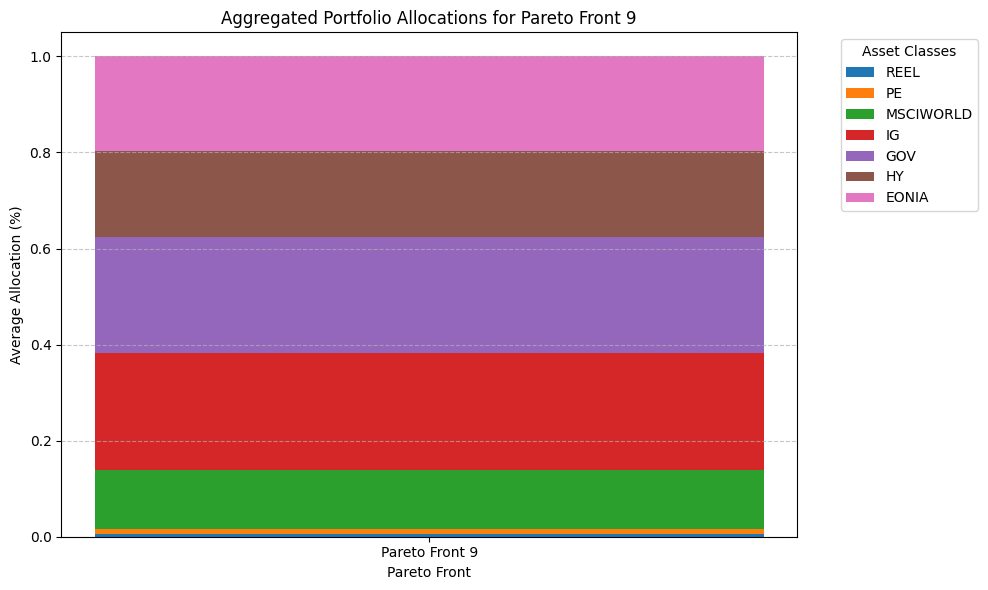

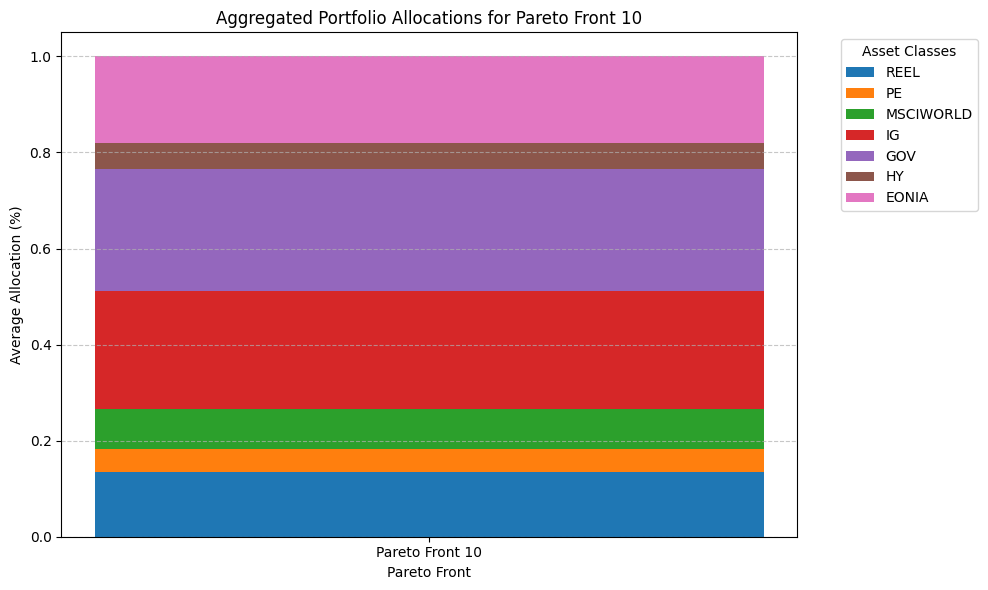

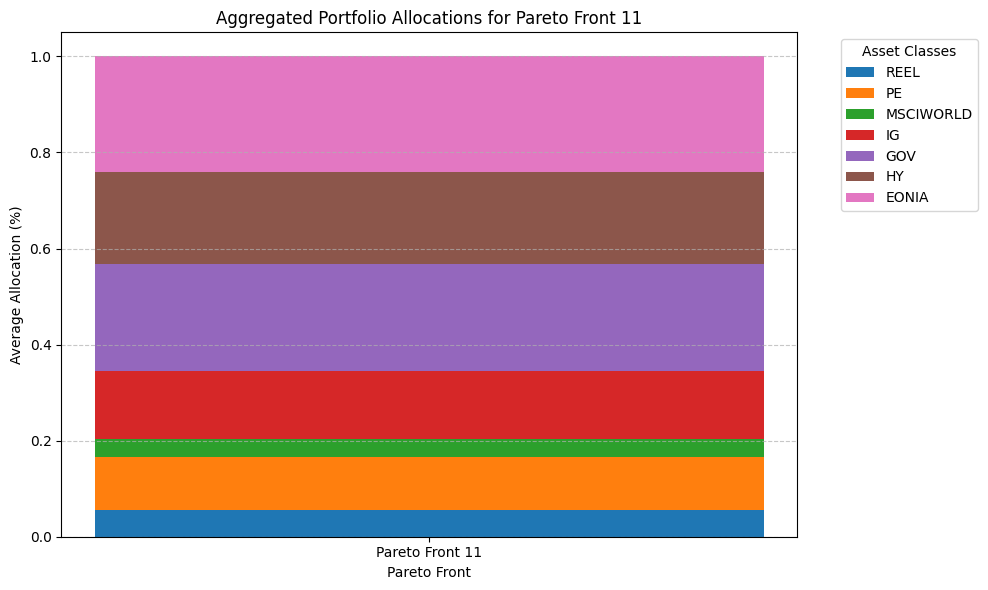

In [19]:
for run_idx, pareto_front in enumerate(pareto_fronts):
    # Extract weights for the Pareto front
    weights = np.array([solution['weights'] for solution in pareto_front])

    # Calculate mean allocation for each asset class
    mean_allocations = weights.mean(axis=0)
    
    # Calculate standard deviation for error bars (optional)
    std_allocations = weights.std(axis=0)
    
    # Plot the aggregated allocations
    plt.figure(figsize=(10, 6))
    bottom = 0
    for i, asset in enumerate(asset_classes):
        plt.bar(f"Pareto Front {run_idx + 1}", mean_allocations[i], bottom=bottom, label=asset)
        bottom += mean_allocations[i]

    # Add labels, title, and legend
    plt.title(f'Aggregated Portfolio Allocations for Pareto Front {run_idx + 1}')
    plt.xlabel("Pareto Front")
    plt.ylabel("Average Allocation (%)")
    plt.legend(title="Asset Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [22]:
sub_sample = 20

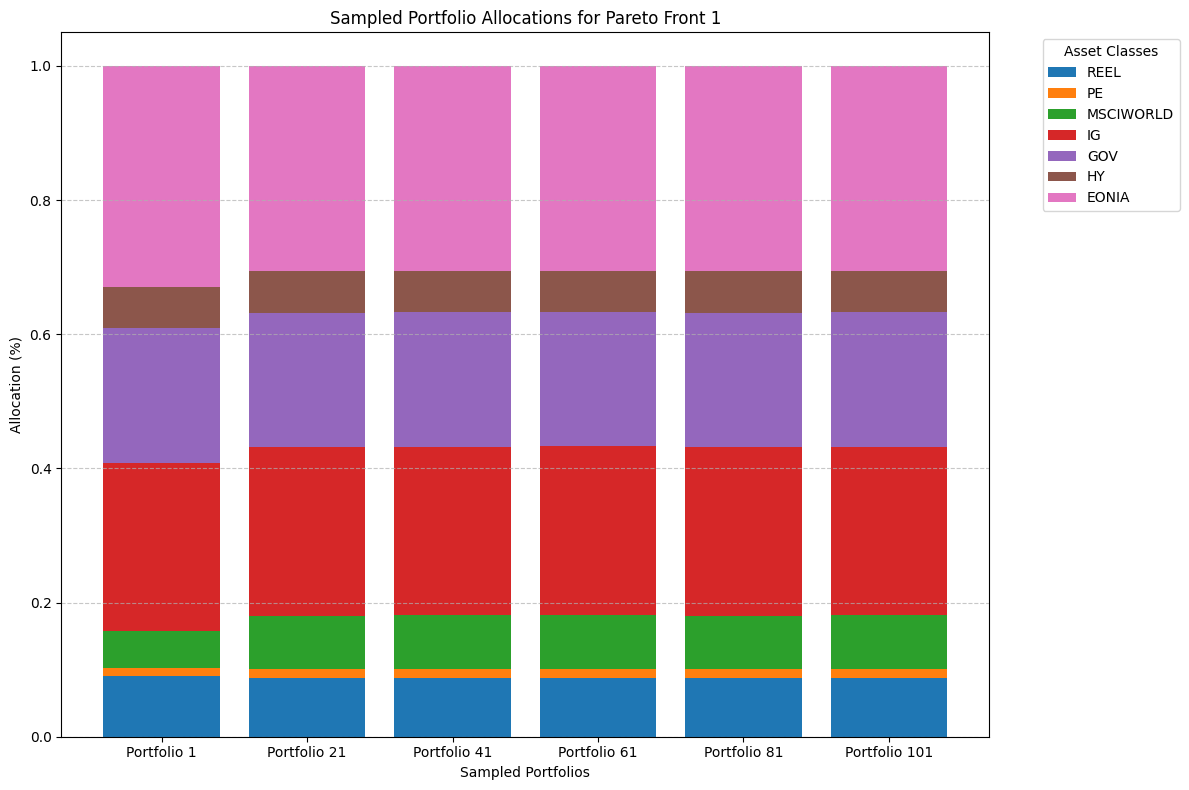

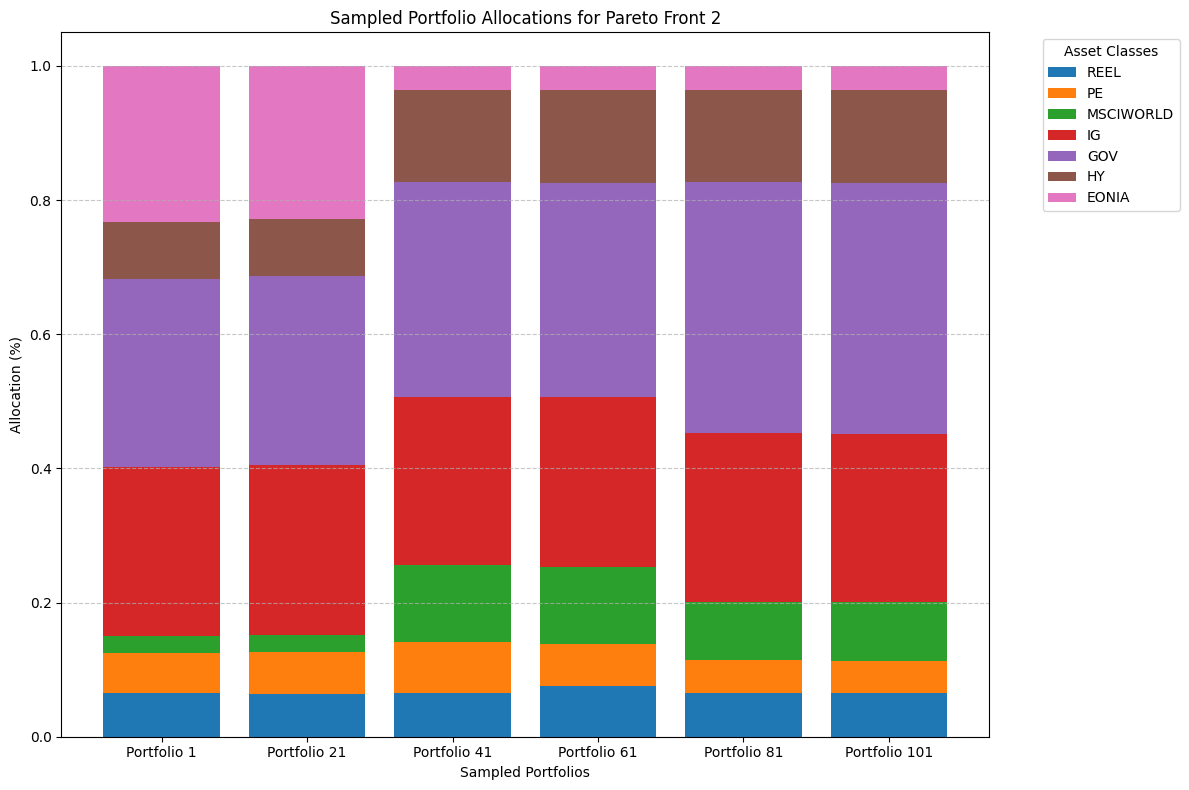

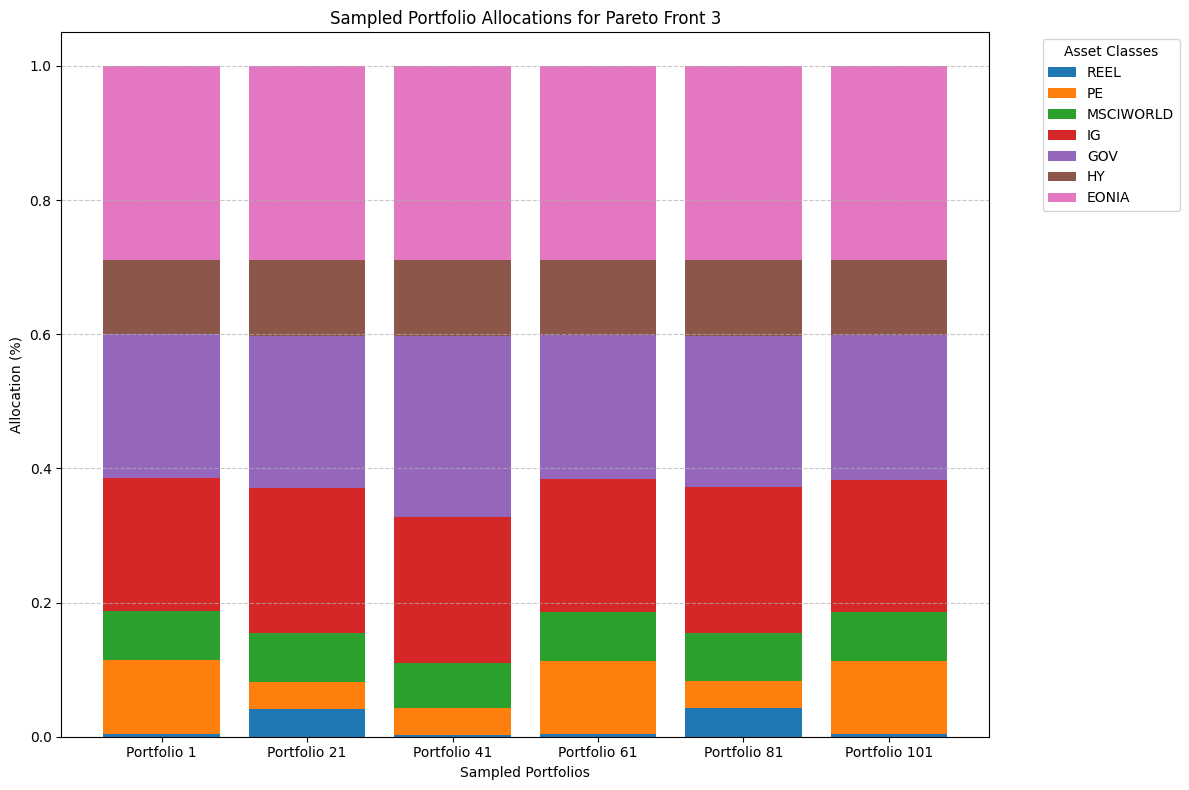

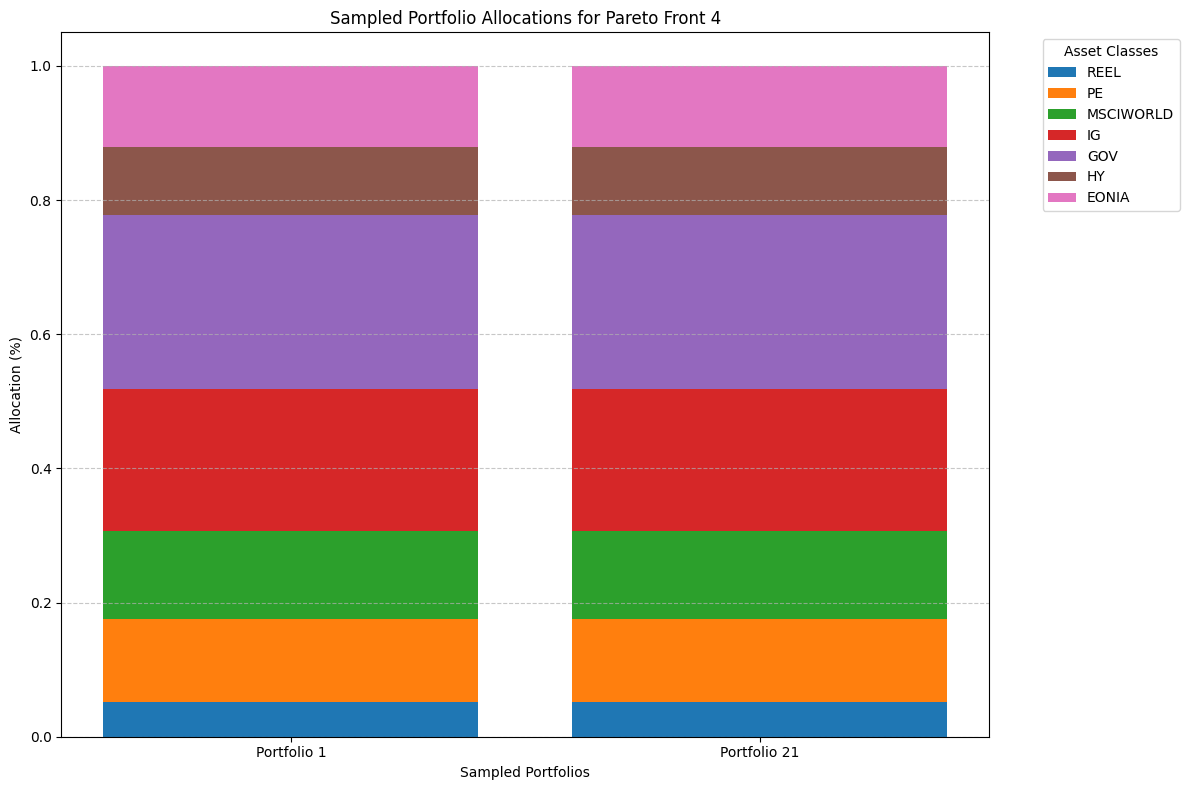

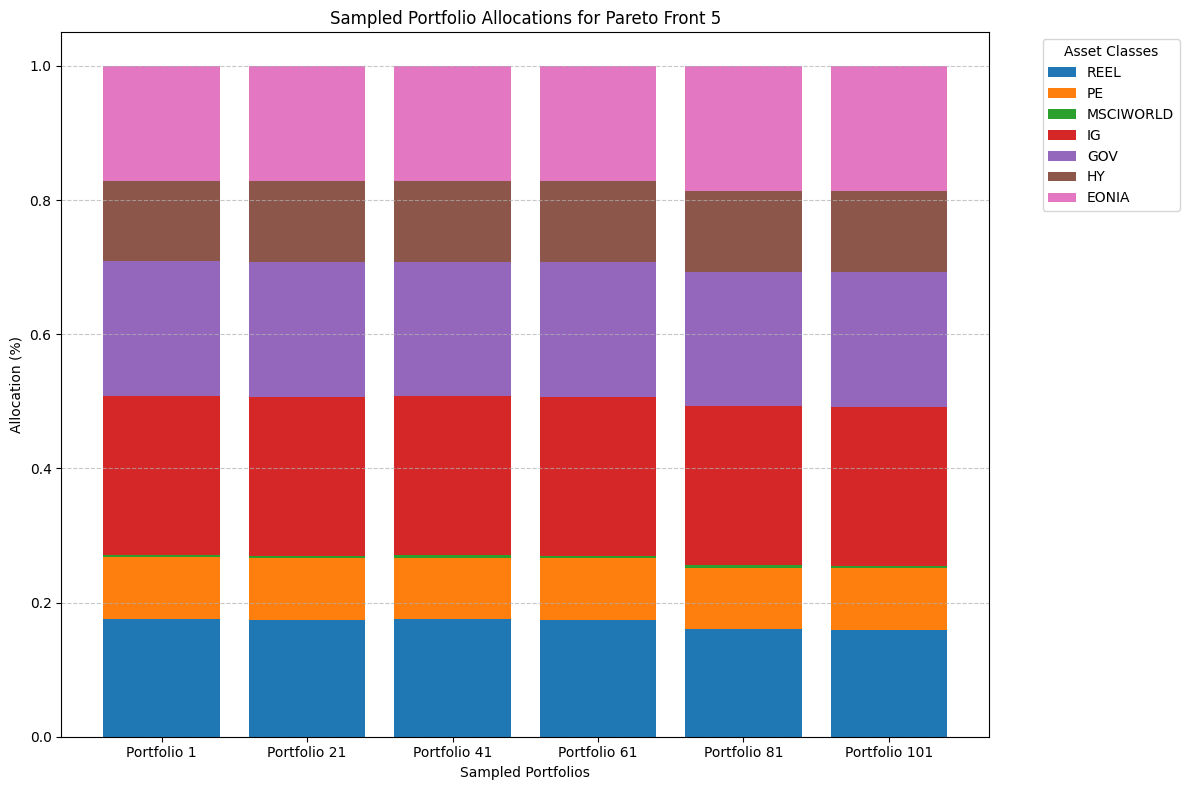

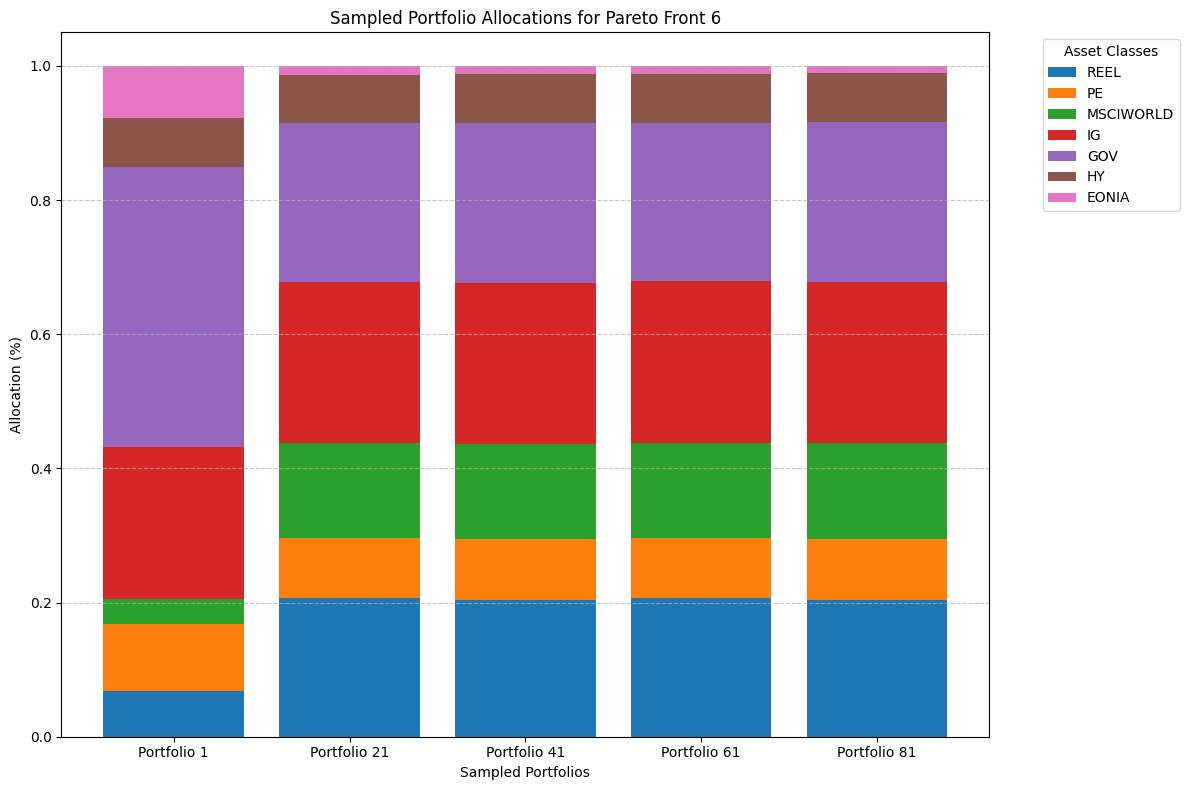

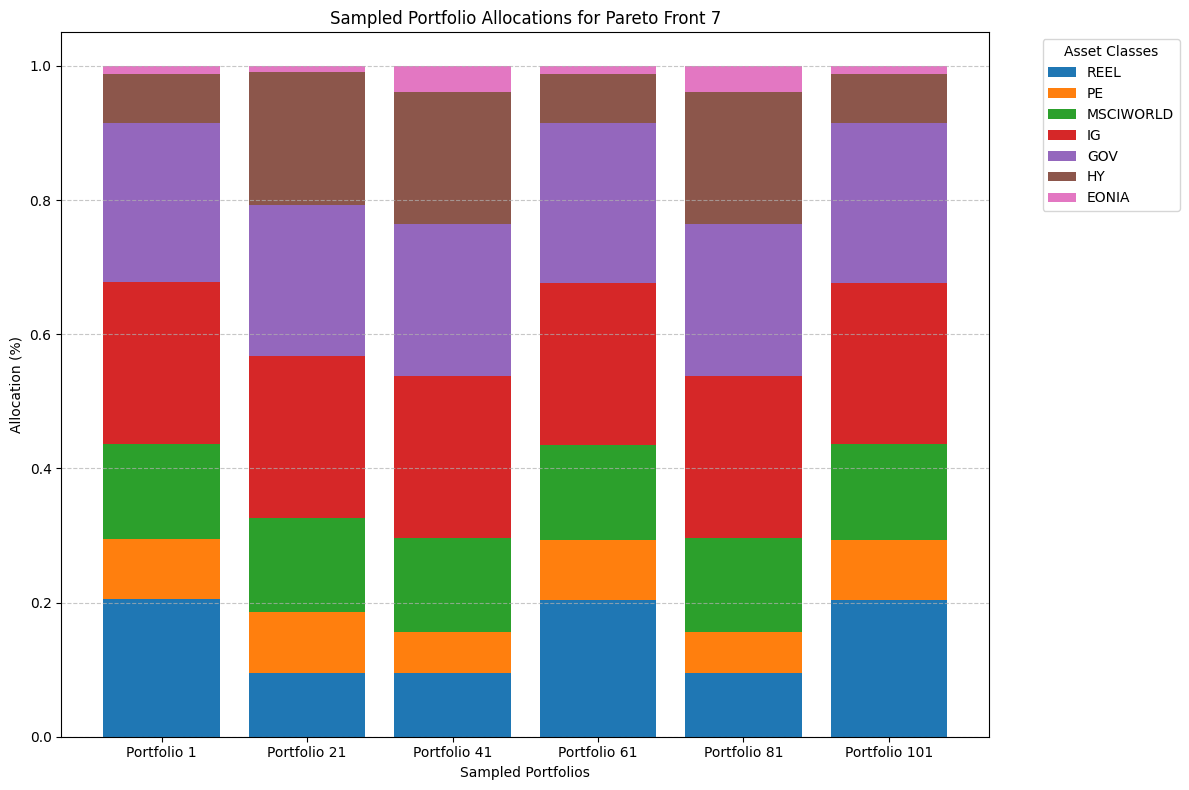

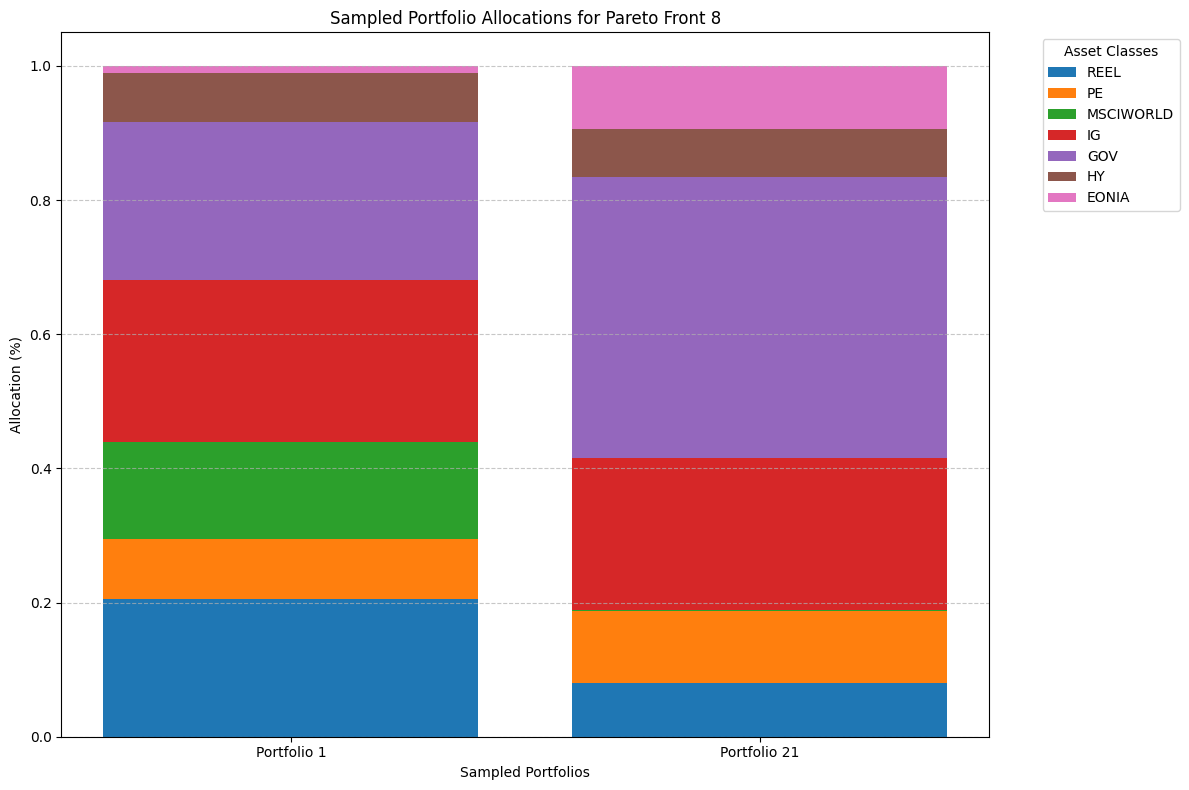

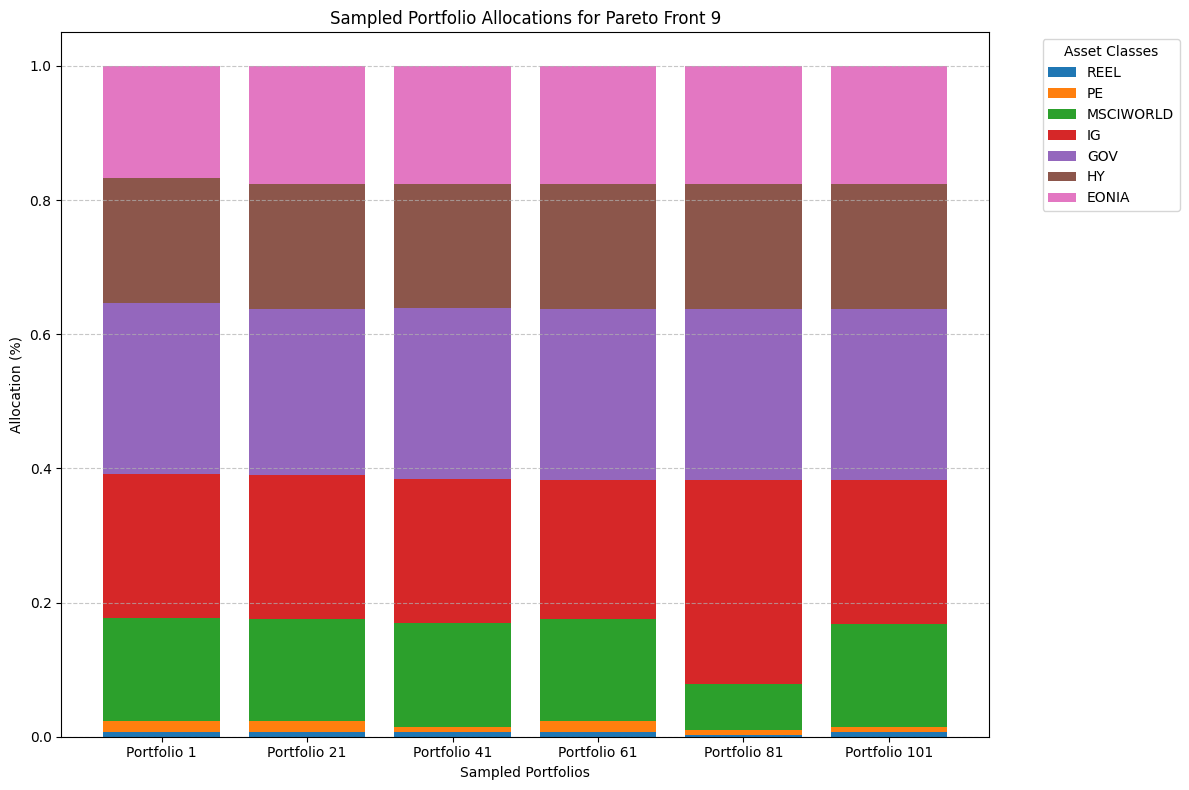

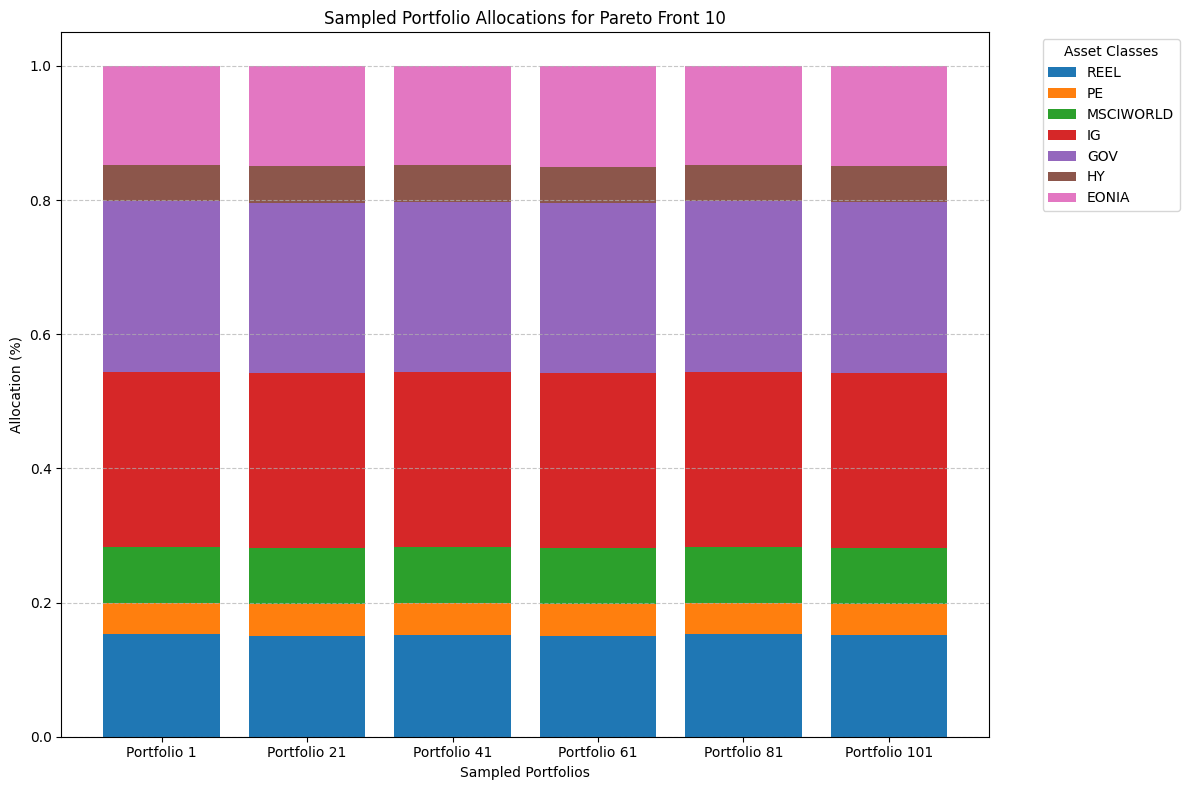

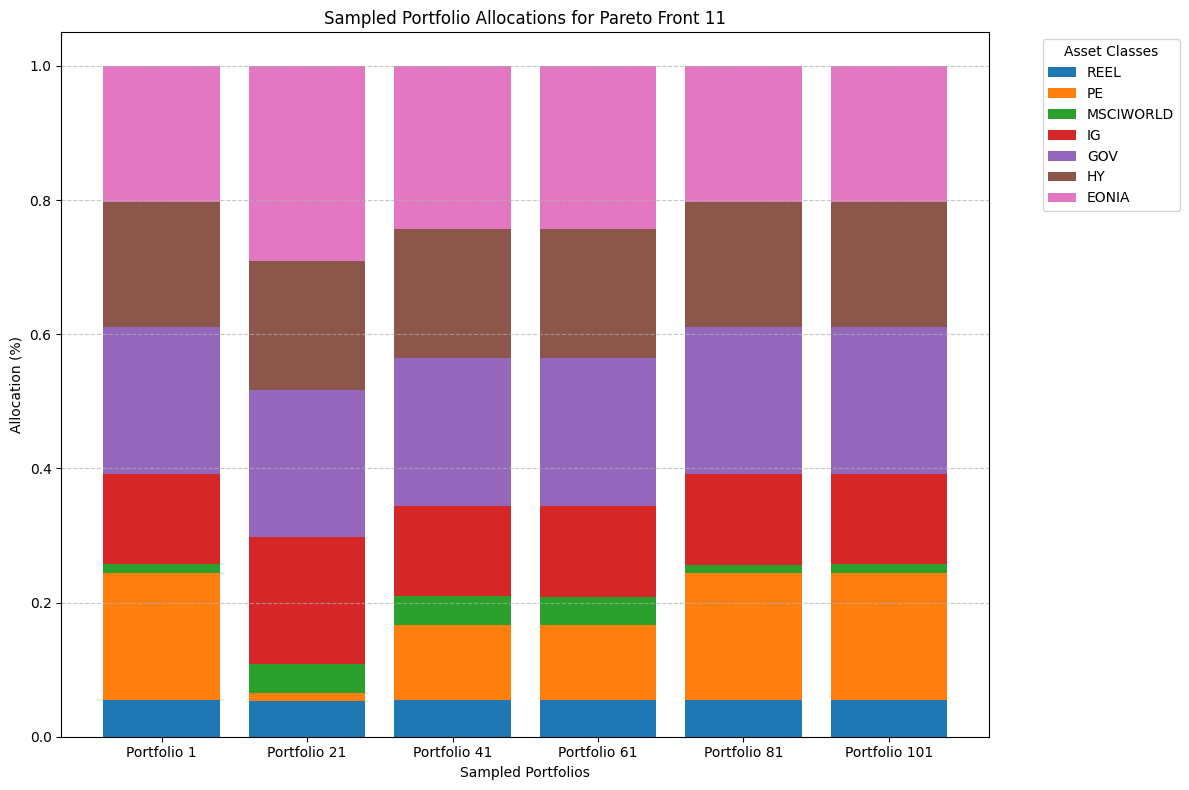

In [23]:
for run_idx, pareto_front in enumerate(pareto_fronts):
    weights = np.array([solution['weights'] for solution in pareto_front])
    sampled_weights = weights[::sub_sample]
    portfolios = [f"Portfolio {i * sub_sample + 1}" for i in range(len(sampled_weights))]

    plt.figure(figsize=(12, 8))
    for i, asset in enumerate(asset_classes):
        plt.bar(portfolios, sampled_weights[:, i], label=asset, bottom=np.sum(sampled_weights[:, :i], axis=1))
    
    plt.title(f'Sampled Portfolio Allocations for Pareto Front {run_idx + 1}')
    plt.xlabel("Sampled Portfolios")
    plt.ylabel("Allocation (%)")
    plt.legend(title="Asset Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    plt.show()